In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Đọc file CSV
df = pd.read_csv("../data/raw/TSLA_2020-01-01_2025-05-27.csv")

# Xem vài dòng đầu
df

,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,28.68400001525879,28.713333129882812,28.11400032043457,28.299999237060547,142981500
3,2020-01-03,29.534000396728516,30.266666412353516,29.128000259399414,29.366666793823242,266677500
4,2020-01-06,30.1026668548584,30.104000091552734,29.333332061767578,29.364667892456055,151995000
...,...,...,...,...,...,...
1353,2025-05-19,342.0899963378906,343.0,333.3699951171875,336.29998779296875,88869900
1354,2025-05-20,343.82000732421875,354.989990234375,341.6300048828125,347.8699951171875,131715500
1355,2025-05-21,334.6199951171875,347.3500061035156,332.20001220703125,344.42999267578125,102354800
1356,2025-05-22,341.0400085449219,347.2699890136719,331.3900146484375,331.8999938964844,97113400


In [ ]:
df_clean = df.drop(index=[0, 1])

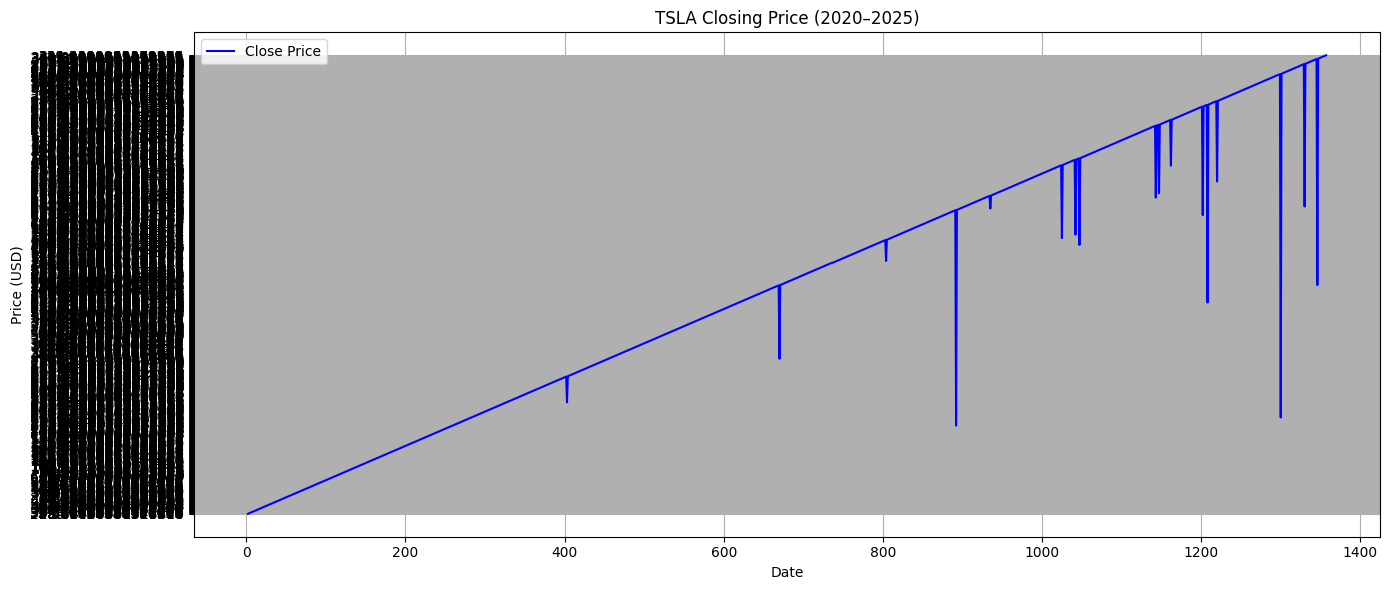

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['Close'], label='Close Price', color='blue')

plt.title("TSLA Closing Price (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Giữ lại các cột số
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Tính ma trận tương quan
corr_matrix = df_numerical.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of TSLA Stock Features")
plt.tight_layout()
plt.show()
